# Environment Testing

In [1]:
from IES.rl_env.HIES_env_new import HIES_Env
from IES.Utils.HIES_config.HIES_options import HIES_Options
from IES.Utils.param_config import Config
import numpy as np
import matplotlib.pyplot as plt

In [2]:
observations = ['electricity_price', 'pv_power', 'electrical_demand', 'heating_demand', 'cooling_demand', 'T_a_indoor', 'BESS_states', 'TESS_states', 'CESS_states', 'HESS_states', 'hour', 'outdoor_drybulb_temperature']

In [3]:
action_name = ['power_grid', 'electrical_storage', 'heating_storage', 'cooling_storage', 'absorption_chilling', 'electrolyzer', 'fuel_cell', 'hydrogen_purchased']

In [4]:
action_name = ['electrical_storage', 'heating_storage', 'cooling_storage', 'absorption_chilling', 'electrolyzer', 'fuel_cell', 'hydrogen_purchased']

In [5]:
data_path = {
    'solar_radiation': 'C:/Users/zhenyupu/Research/IES/IES/data/data/solar_radiation_train.csv',
    'electricity_price': 'C:/Users/zhenyupu/Research/IES/IES/data/data/electricity_price_train.csv',
    'electrical_demand': 'C:/Users/zhenyupu/Research/IES/IES/data/data/electricity_demand_train.csv',
    'heating_demand': 'C:/Users/zhenyupu/Research/IES/IES/data/data/heating_demand.csv',
    'cooling_demand': 'C:/Users/zhenyupu/Research/IES/IES/data/data/cooling_demand__train.csv',
    'T_a_indoor': 'C:/Users/zhenyupu/Research/IES/IES/data/data/T_a_train.csv',
    'outdoor_drybulb_temperature': 'C:/Users/zhenyupu/Research/IES/IES/data/data/outdoor_drybulb_temperature_train.csv',
    'outdoor_relative_humidity': 'C:/Users/zhenyupu/Research/IES/IES/data/data/outdoor_relative_humidity_train.csv'
}

In [6]:
time_step    = Config.time_step
env            = HIES_Env(observations, 
                          action_name,
                          data_path=data_path,
                          program='train', K=time_step)                 # 创建一个HEMS系统（训练环境）

In [7]:
state_dim = env.state_dim
action_dim = env.action_dim
print(f'state dim: {state_dim}, action_dim: {action_dim}')

state dim: 176, action_dim: 7


In [10]:
def take_actions():
    action_neg_to_pos = np.random.uniform(-1, 1, size = 3)
    action_zero_to_pos = np.random.uniform(0, 1, size = 4)
    actions = np.concatenate([action_neg_to_pos, action_zero_to_pos])
    return actions

In [11]:
actions = take_actions()
print(f'actions: {take_actions()}')

actions: [-0.29367508  0.40740841  0.2669026   0.2109277   0.86788656  0.74519925
  0.45467718]


In [12]:
state = env.reset()

In [13]:
next_state, reward, done, info = env.step(actions)

In [14]:
env.action_kwargs

{'power_grid': None,
 'electrical_storage': 0.31863051541449106,
 'heating_storage': 0.8851169492912849,
 'cooling_storage': 0.6857220698884658,
 'absorption_chilling': 0.24095049801284263,
 'electrolyzer': 0.6498360562957061,
 'fuel_cell': 0.04529652466094514,
 'hydrogen_purchased': 0.18488568182634224}

In [15]:
env.env_options.Q_ED[env.day][0] + env.decisions['P_bssc'] + env.decisions['P_bssd'] + env.decisions['P_el'] - env.decisions['P_fc'] - env.decisions['P_g'] - env.env_options.P_solar_gen[env.day][0]

0.0

In [16]:
env.decisions

{'P_el': 136.9704901332271,
 'v_el': 70.7096648553143,
 'P_el_1': 34.24262253330677,
 'i_el': 399.4919440856469,
 'v_cdg': 49.284636404154064,
 'p_t': 30.83,
 'm_buy': 9.244284091317112,
 'P_fc': 32.26482623304726,
 'i_fc': 82.59795515660099,
 'v_fc': 17.345570582886207,
 'g_FC': 60.22767563502155,
 'P_bssd': 0.0,
 'P_bssc': 25.490441233159284,
 'g_tesc': 44.25584746456425,
 'g_tesd': 0.0,
 'g_AC': 48.19009960256852,
 'q_AC': 45.29869362641441,
 'q_cssc': 68.57220698884659,
 'q_cssd': 0.0,
 'P_g': 215.23610513333915}

In [17]:
env.state.shape

(176,)

In [11]:
env.env_options.Q_ED[env.day][env.time_step]

59.27

In [12]:
episode = 3
transitions = []
days = []

In [13]:
for ep in range(episode):
    state = env.reset()
    days.append(env.day)
    done = False
    trace = {}
    trace['state'] = []
    trace['action'] = []
    trace['decision'] = []
    trace['state'].append(env.state)
    trace['violation'] = []
    trace['cost'] = []
    trace['reward'] = []
    while not done:
        actions = take_actions()
        next_state, reward, done, violation, cost = env.step(actions)
        trace['state'].append(env.state)
        trace['action'].append(actions)
        trace['decision'].append(env.decisions)
        trace['violation'].append(violation)
        trace['cost'].append(cost)
        trace['reward'].append(reward)
    transitions.append(trace)

In [14]:
100000 / (21 * 24)

198.4126984126984

In [15]:
transitions[0]['violation']

[37.81446622737778,
 171.98041722439035,
 153.07125876685183,
 305.70938073374634,
 611.7611324633544,
 737.9701392133018,
 1077.8198946990385,
 1041.780224855751,
 1558.8101460275884,
 1530.4839144772773,
 1543.8122255490118,
 1741.6575090794174,
 1745.1733275438341,
 1895.630243311394,
 2021.2383638849542,
 2077.035127256403,
 2384.108425054066,
 2386.3245041559835,
 2462.039898014203,
 2832.412294440711,
 2860.2901048544345,
 2959.66005217322,
 3241.9362026414046,
 3298.914531911726]

In [17]:
DAYS = episode
decisions = get_decisions(DAYS, transitions, T=24)

In [18]:
decisions['P_FC'][0]

array([68.90783755, 61.99605107, 52.80751661, 64.09101496, 40.51912805,
       35.10224054, 37.94847918, 34.85506379, 66.96317897, 50.71314973,
       58.79732478, 39.1595681 , 66.75970111, 77.63745058, 74.05515986,
       62.19950996, 60.90077145, 62.66004099, 70.30969945, 73.40630287,
       50.35916486, 72.79016712, 39.99982624, 31.59194648])

In [19]:
day = 0
test_day = days[day]
bar_width = 0.75
hours = np.arange(0, 24)

In [20]:
env_options.P_solar_gen[test_day] + decisions['P_FC'][day] - decisions['P_bssd'][day] + decisions['P_g_buy'][day] - decisions['P_EL'][day] - decisions['P_bssc'][day] + decisions['P_g_sell'][day] - env_options.Q_ED[test_day]

array([ 7.10542736e-15,  1.42108547e-14, -7.10542736e-15,  7.10542736e-15,
       -1.42108547e-14, -4.26325641e-14, -4.26325641e-14,  5.68434189e-14,
       -2.84217094e-14,  7.10542736e-14,  0.00000000e+00, -2.84217094e-14,
       -1.42108547e-13,  8.52651283e-14,  2.84217094e-14,  5.68434189e-14,
       -5.68434189e-14,  2.84217094e-14, -7.10542736e-14,  1.42108547e-14,
        1.42108547e-14, -2.84217094e-14, -7.10542736e-15,  0.00000000e+00])

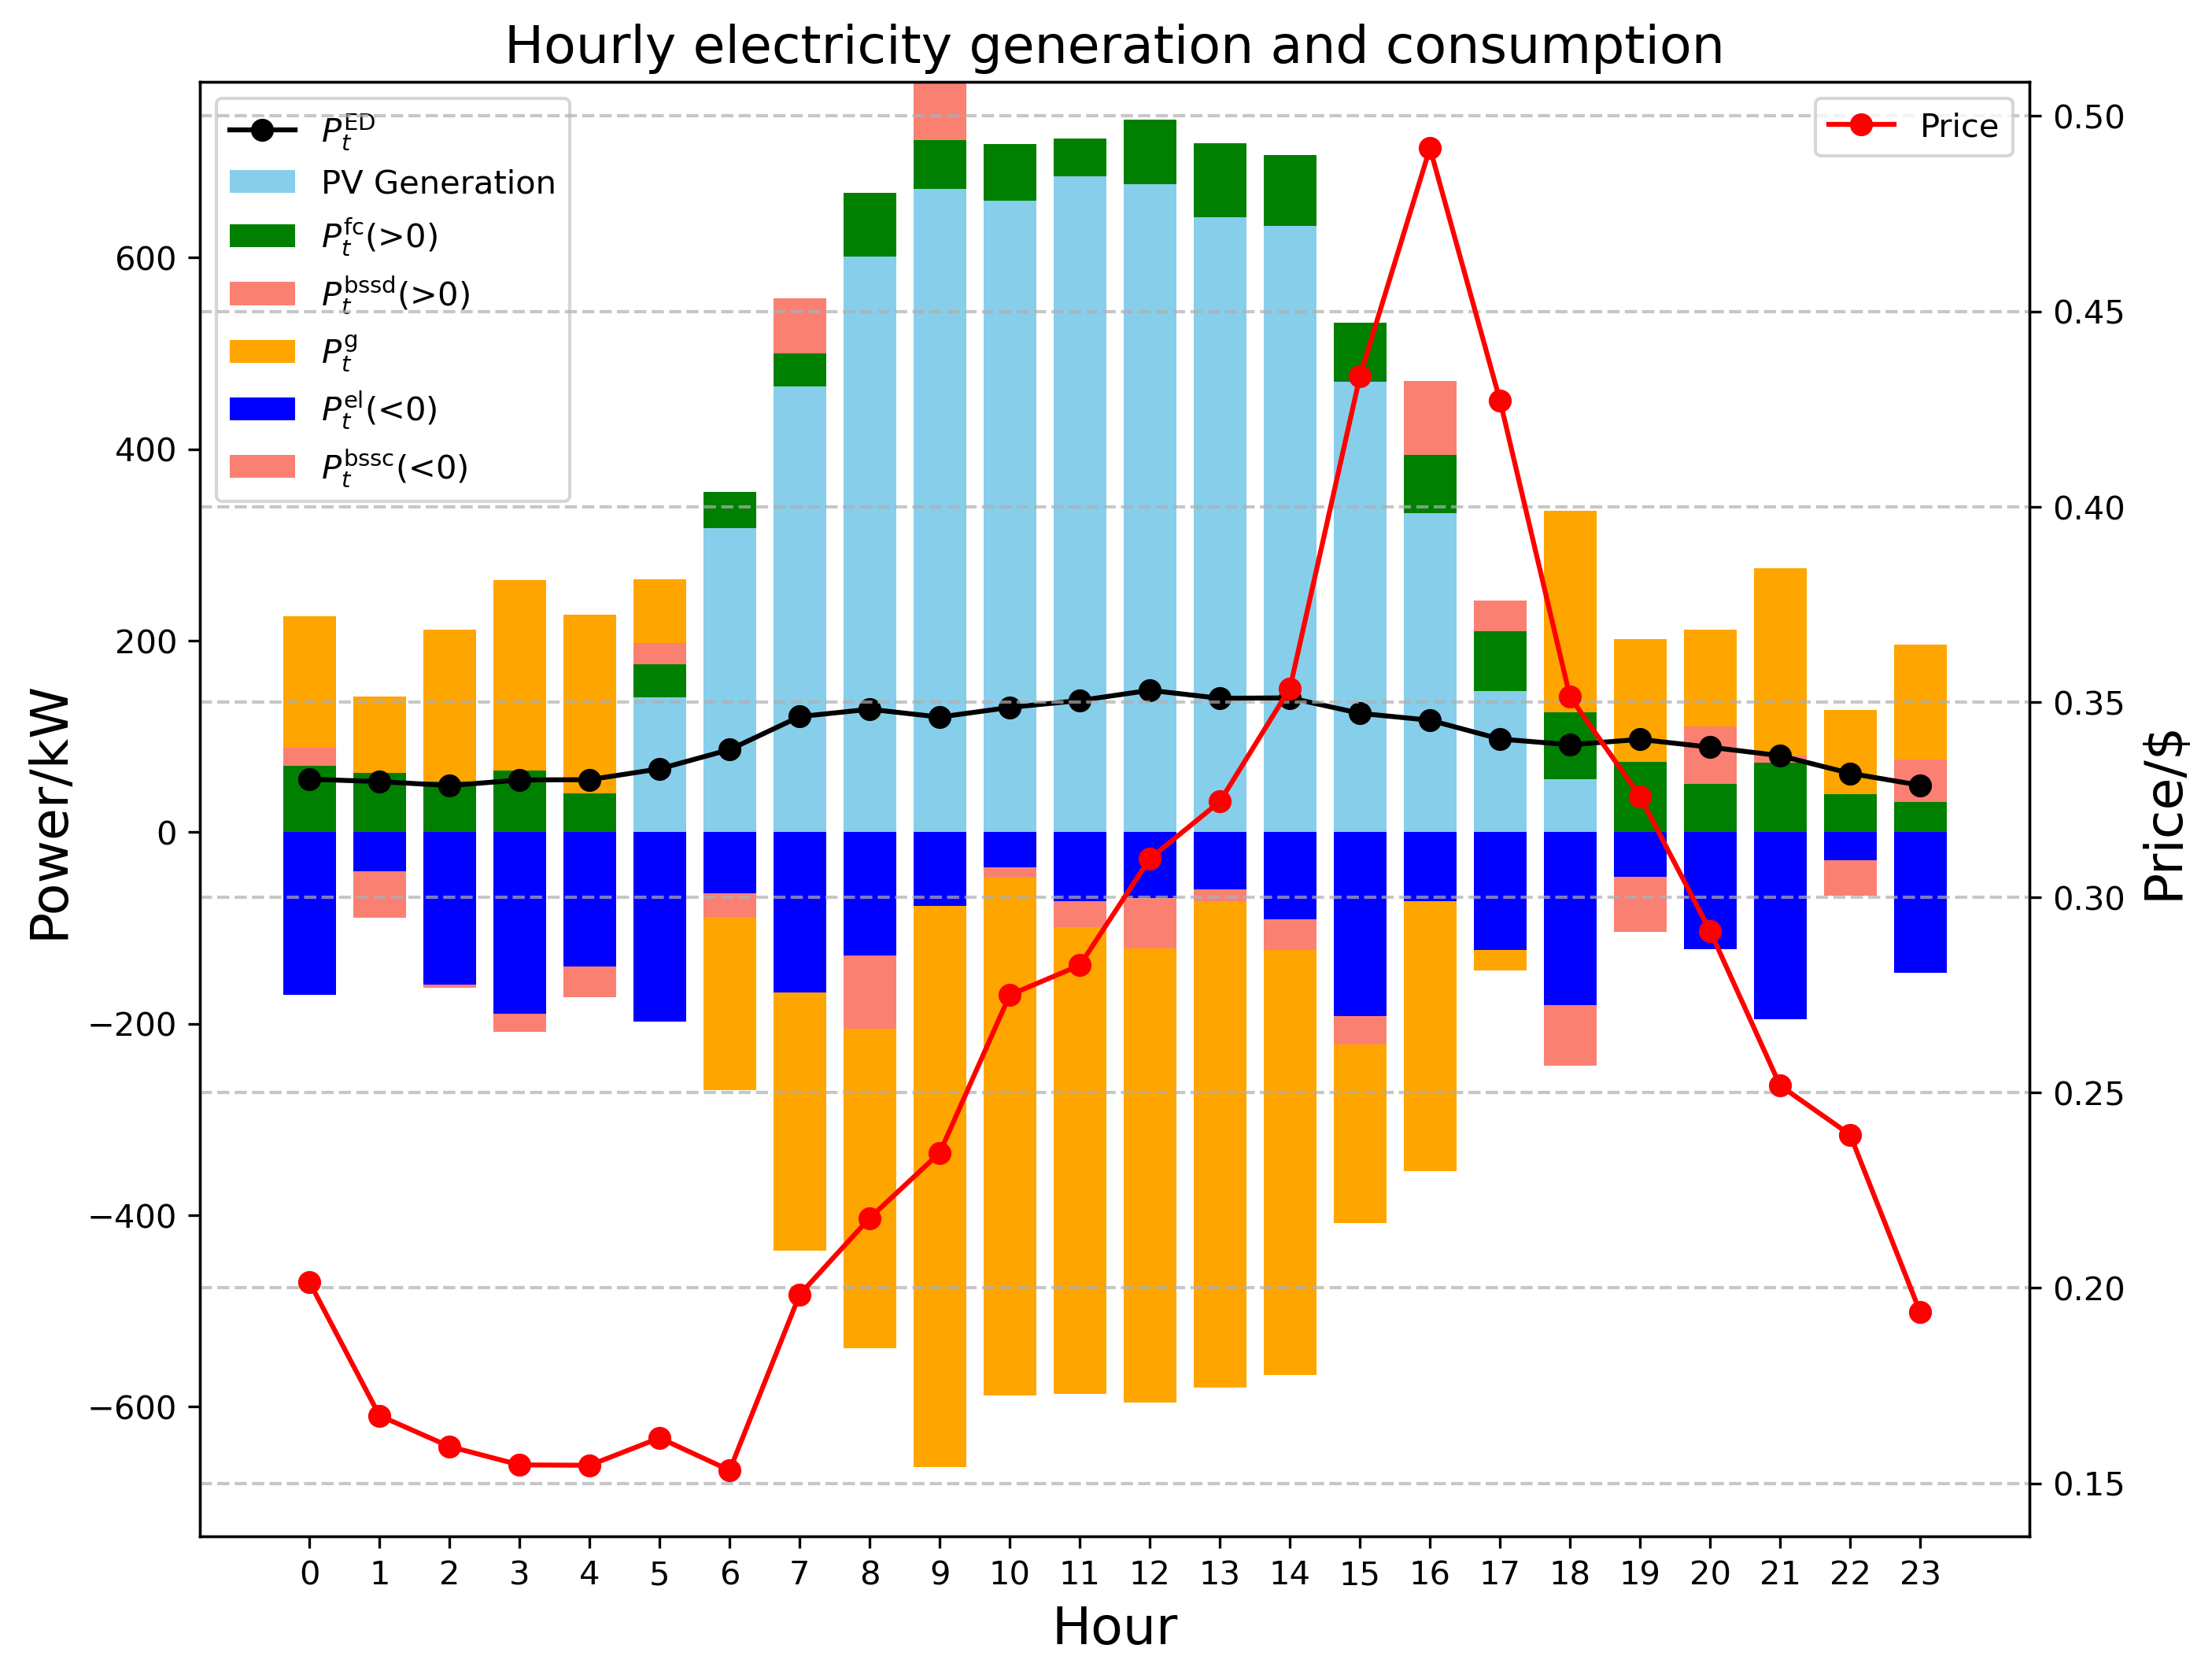

In [21]:
# 电需求
fig1, ax1 = plt.subplots(figsize=(10, 8), dpi=300)

bar1 = ax1.bar(hours, env_options.P_solar_gen[test_day], bar_width, label='PV Generation', color='skyblue', bottom=0)
bar2 = ax1.bar(hours, decisions['P_FC'][day], bar_width, label='$P^{\mathrm{fc}}_t$(>0)', color='green', bottom=env_options.P_solar_gen[test_day])
bar3 = ax1.bar(hours, - decisions['P_bssd'][day], bar_width, label='$P^{\mathrm{bssd}}_t$(>0)', color='salmon', bottom=decisions['P_FC'][day] + env_options.P_solar_gen[test_day])
bar4 = ax1.bar(hours, decisions['P_g_buy'][day], bar_width, label='$P^{\mathrm{g}}_t$', color='orange', bottom=decisions['P_FC'][day] - decisions['P_bssd'][day] + env_options.P_solar_gen[test_day])

# # bar5 = ax1.bar(hours, -P_CO, bar_width, label='$P^{CO}_t$(<0)', color='purple', bottom=0)
bar6 = ax1.bar(hours, - decisions['P_EL'][day], bar_width, label='$P^{\mathrm{el}}_t$(<0)', color='blue', bottom=0)
bar7 = ax1.bar(hours, - decisions['P_bssc'][day], bar_width, label='$P^{\mathrm{bssc}}_t$(<0)', color='salmon', bottom=-decisions['P_EL'][day])
bar8 = ax1.bar(hours, decisions['P_g_sell'][day], bar_width, color='orange', bottom=-decisions['P_EL'][day] - decisions['P_bssc'][day])


ax1.plot(hours, env_options.Q_ED[test_day], label='$P^{\mathrm{ED}}_t$', color='black', marker='o')
ax1.set_xlabel('Hour', fontsize=16)
ax1.set_ylabel('Power/kW', fontsize=16)
ax1.set_title('Hourly electricity generation and consumption', fontsize=16)
ax1.set_xticks(hours)
ax1.set_xticklabels(hours)
ax1.legend(loc='upper left')

ax12 = ax1.twinx()
ax12.plot(hours, env_options.lambda_b[test_day], label='Price', color='red', marker='o')
ax12.set_ylabel('Price/$', fontsize=16)
plt.grid(visible=True, linestyle='--', linewidth=1.0, alpha=0.7)
ax12.legend(loc='upper right')
# plt.savefig('result/policy/SAC1')

In [22]:
- decisions['g_tesd'][day] + decisions['g_FC'][day] + 100 + env_options.P_solar_heat[test_day] - decisions['g_tesc'][day] - (decisions['g_AC'][day]+100) - env_options.Q_HD[test_day]

array([-37.81446623,  85.37530451, -15.95275877,  35.68540886,
        55.69019971,  71.17026608, 150.60795931, 102.42171624,
       381.65966363, 388.82104688, 219.12754274, 277.38344949,
       247.61062371, 349.17408422, 333.6252963 , 232.16353823,
       195.02798452,  28.66597678,  10.82170137,  65.7623818 ,
        33.46955238,  95.19660184,  96.65901571,  39.21763405])

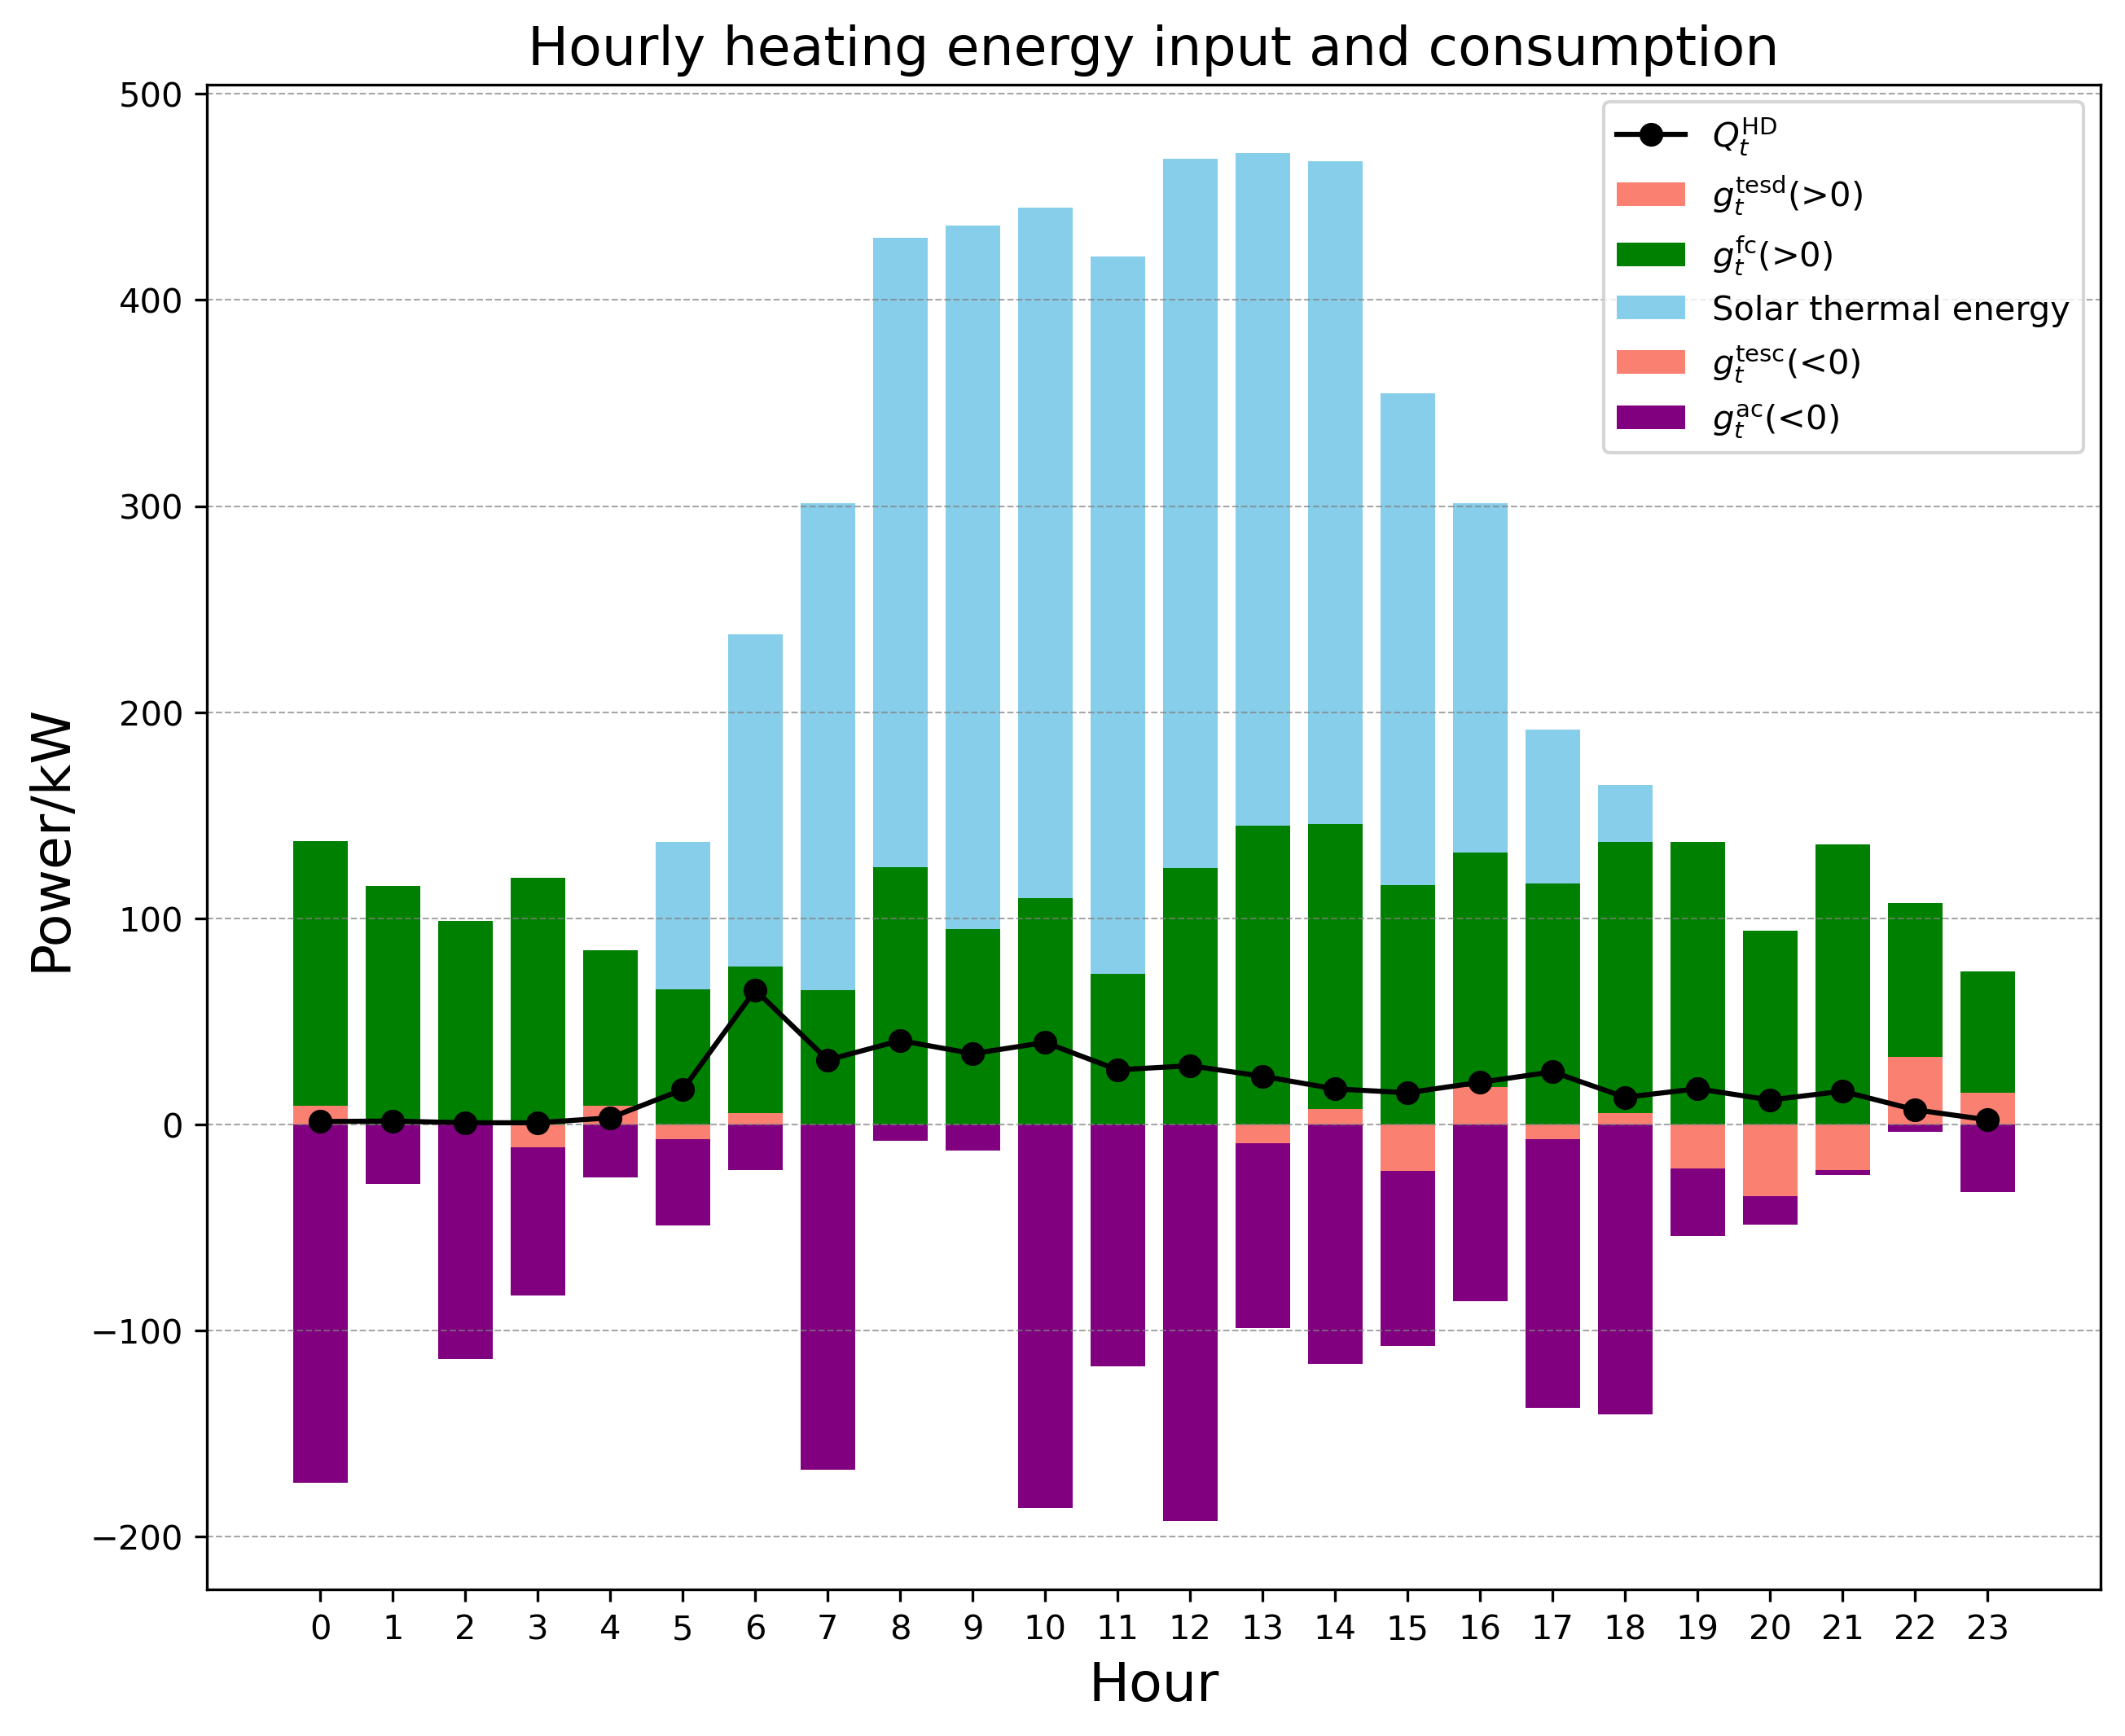

In [23]:
# 热能来源与消耗策略
fig2, ax2 = plt.subplots(figsize=(10, 8), dpi=300)

bar2 = ax2.bar(hours, - decisions['g_tesd'][day], bar_width, label='$g^{\mathrm{tesd}}_t$(>0)', color='salmon', bottom=0)
bar3 = ax2.bar(hours, decisions['g_FC'][day], bar_width, label='$g^{\mathrm{fc}}_t$(>0)', color='green', bottom= - decisions['g_tesd'][day])
bar1 = ax2.bar(hours, env_options.P_solar_heat[test_day], bar_width, label='Solar thermal energy', color='skyblue', bottom= - decisions['g_tesd'][day]+decisions['g_FC'][day])

bar4 = ax2.bar(hours, - decisions['g_tesc'][day], bar_width, label='$g^{\mathrm{tesc}}_t$(<0)', color='salmon', bottom=0)
bar5 = ax2.bar(hours, - decisions['g_AC'][day], bar_width, label='$g^{\mathrm{ac}}_t$(<0)', color='purple', bottom=-decisions['g_tesc'][day])

ax2.plot(hours, env_options.Q_HD[test_day], label='$Q^{\mathrm{HD}}_t$', color='black', marker='o')
ax2.set_xlabel('Hour', fontsize=16)
ax2.set_ylabel('Power/kW', fontsize=16)
ax2.set_title('Hourly heating energy input and consumption', fontsize=16)
ax2.set_xticks(hours)
ax2.set_xticklabels(hours)
plt.grid(axis='y', color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
ax2.legend()
# plt.savefig('result/policy/SAC2')

In [24]:
np.mean(np.minimum(- decisions['q_cssd'][day] + decisions['q_AC'][day] - decisions['q_cssc'][day] - env_options.Q_CD[test_day] , 0))

-136.89830664855046

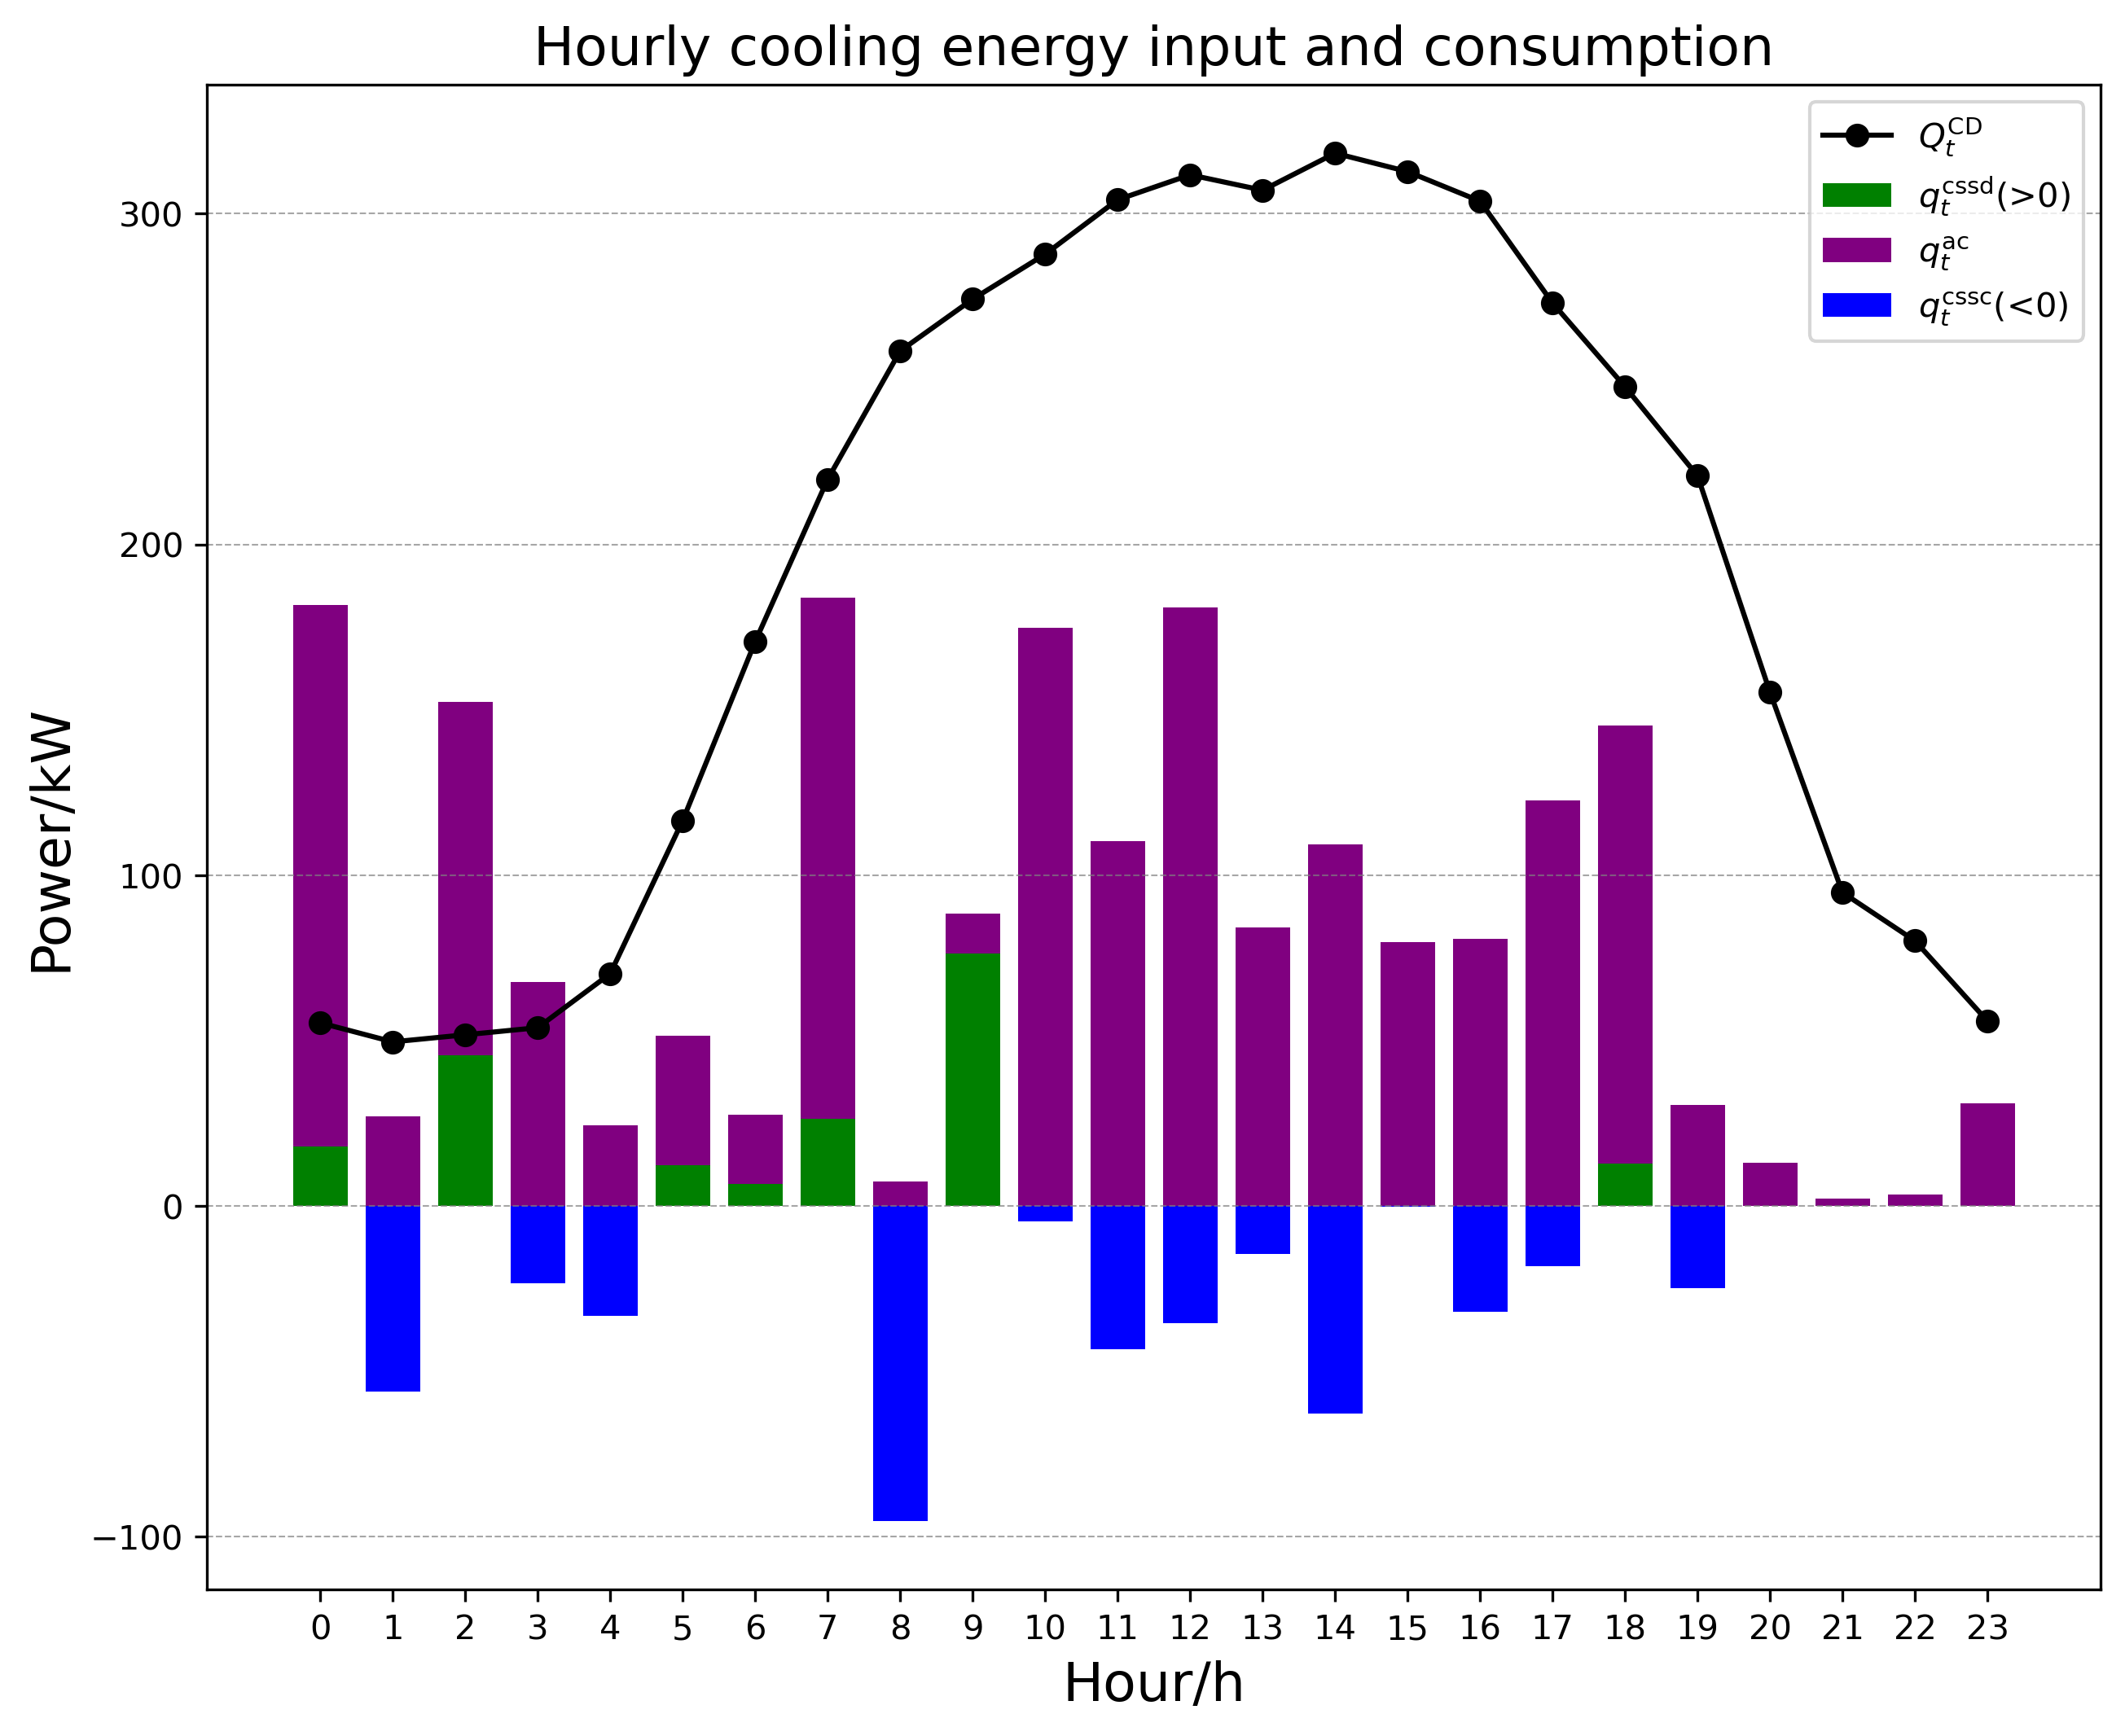

In [25]:
# 冷能来源与消耗策略
fig3, ax3 = plt.subplots(figsize=(10, 8), dpi=300)

bar1 = ax3.bar(hours, - decisions['q_cssd'][day], bar_width, label='$q^{\mathrm{cssd}}_t$(>0)', color='green', bottom=0)
bar2 = ax3.bar(hours, decisions['q_AC'][day], bar_width, label='$q^{\mathrm{ac}}_t$', color='purple', bottom= - decisions['q_cssd'][day])
bar3 = ax3.bar(hours, - decisions['q_cssc'][day], bar_width, label='$q^{\mathrm{cssc}}_t$(<0)', color='blue', bottom=0)
ax3.plot(hours, env_options.Q_CD[test_day], label='$Q^{\mathrm{CD}}_t$', color='black', marker='o')
ax3.set_xlabel('Hour/h', fontsize=16)
ax3.set_ylabel('Power/kW', fontsize=16)
ax3.set_title('Hourly cooling energy input and consumption', fontsize=16)
ax3.set_xticks(hours)
ax3.set_xticklabels(hours)
plt.grid(axis='y', color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
ax3.legend()
# plt.savefig('result/policy/SAC3')

In [26]:
decisions.keys()

dict_keys(['P_g_buy', 'P_g_sell', 'P_bssc', 'P_bssd', 'm_buy', 'P_EL', 'P_FC', 'g_FC', 'g_tesc', 'g_tesd', 'g_AC', 'q_AC', 'q_cssc', 'q_cssd', 'S_bss', 'S_hss', 'S_tes', 'S_css', 'p_t', 'T_ely', 'T_tank', 'C', 'v_el', 'i_el', 'v_cdg', 'v_fc', 'i_fc'])

In [27]:
# 储氢罐
P_fc = decisions['P_FC'][day]
P_el = decisions['P_EL'][day]
p_t  = decisions['p_t'][day]
S_hss = decisions['S_hss'][day]
m_buy = decisions['m_buy'][day]
T_el = decisions['T_ely'][day]
v_el = decisions['v_el'][day]
i_el = decisions['i_el'][day]
v_cdg = decisions['v_cdg'][day]
v_fc  = decisions['v_fc'][day]
i_fc = decisions['i_fc'][day]
T_tank = decisions['T_tank'][day]

g_fc = decisions['g_FC'][day]

In [28]:
p_t_cal = (env_options.b0 + env_options.b1 * T_tank) * (S_hss / env_options.V_tank) / (10**5)

In [29]:
p_t_cal - p_t

array([ -25.08      ,  -46.245     ,  -35.25564795,  -61.0434    ,
        -49.60747984,  -21.1252801 ,  -28.90900304,  -46.94303837,
        -89.12644735,   53.60341062, -101.8202911 ,  -98.19745095,
        -22.49728486,   42.29166076,   63.61224754,  181.38094765,
        213.68739955,  298.97706507,  361.04369055,  367.97569473,
        444.8365    ,  462.4417    ,  517.0117    ,  525.4723    ])

In [30]:
DELTA =  1
m_next = S_hss + env_options.rho * (v_cdg - v_fc) * DELTA + m_buy
print(f'm_next: {m_next}')

m_next: [ 70.61704692  45.4526526   53.86192245  24.40713928  39.43300861
  63.55588159  70.65068758  38.37546068  15.67183846 121.42727884
  16.11157973   7.69453164  56.34422088 117.26635391 133.34291546
 179.58428977 152.9199842  198.02769391 198.89187789 206.21254507
 236.53657351 220.23800582 238.86812995 234.34843084]


In [31]:
m_buy

array([48.93091711, 47.23344585,  0.93949002, 21.85159769, 15.77141755,
        8.06547589, 32.81647947,  4.80492039, 14.14034813, 34.62360597,
       15.92844762,  1.00537731, 12.43765718, 42.32043362, 44.08676809,
       30.31966071,  6.77370321, 21.57092177,  5.01134437, 30.77797821,
       34.87143866, 17.99890322, 39.68488517, 31.07392007])

In [32]:
p_t

array([ 30.83  ,  46.245 ,  60.1185,  61.0434,  68.4426,  73.992 ,
        77.6916,  87.8655,  90.3319,  94.6481, 105.1303, 109.4465,
       109.7548, 113.1461, 125.4781, 138.735 , 148.9089, 150.7587,
       157.5413, 159.3911, 168.0235, 179.1223, 185.2883, 197.0037])

In [33]:
S_hss

array([ 20.        ,   0.        ,  50.49525173,   0.        ,
        21.04811944,  51.06612822,  37.4220201 ,  29.93552518,
         0.76334088,  86.58033675,   1.85316319,   6.03781281,
        44.97670955,  76.98368618,  89.98902922, 146.47263677,
       146.71102551, 175.54226226, 191.89935929, 177.64712046,
       200.        , 200.        , 200.        , 200.        ])

In [34]:
print(f'P_el:\n{P_el}\n\nv_cdg:\n{v_cdg}')

P_el:
[169.8715722   41.28939666 159.3620641  189.87465413 140.71481653
 197.90729085  63.99660656 167.77878137 128.87219355  77.23697229
  36.90929194  72.09309673  68.60143517  60.15469388  91.37103335
 192.09505425  72.2139693  123.37854479 180.5462039   46.90069484
 122.43813295 195.5938709   29.7808379  146.79459235]

v_cdg:
[59.15000612 15.78140686 56.2017307  65.47270908 50.85395784 68.08428467
 24.98606359 59.17206574 47.58714644 30.23153605 14.79003193 28.29736198
 26.99748543 23.79531611 35.82010493 66.78807642 28.54676016 46.22407115
 63.40635829 18.90999943 46.02328693 67.99958992 12.41875395 53.40775438]


In [35]:
print(f'P_fc:\n{P_fc}\n\nv_fc:\n{v_fc}\n\ng_fc:\n{g_fc}')

P_fc:
[68.90783755 61.99605107 52.80751661 64.09101496 40.51912805 35.10224054
 37.94847918 34.85506379 66.96317897 50.71314973 58.79732478 39.1595681
 66.75970111 77.63745058 74.05515986 62.19950996 60.90077145 62.66004099
 70.30969945 73.40630287 50.35916486 72.79016712 39.99982624 31.59194648]

v_fc:
[40.39439088 35.5900081  29.2030578  37.0462175  21.78308324 18.87096451
 20.40110241 18.73808229 39.0426587  27.74726337 33.36657345 21.05218381
 38.90122124 46.4623449  43.97229462 35.73143237 34.82867923 36.05154749
 41.36882509 43.52127412 27.5012085  43.09299816 21.50390659 16.98383043]

g_fc:
[128.62796342 115.72596199  98.57403101 119.63656125  75.6357057
  65.52418234  70.83716114  65.06278574 124.99793408  94.66454615
 109.75500625  73.09786045 124.61810873 144.92324107 138.2362984
 116.10575193 113.68144004 116.96540985 131.24477231 137.02509869
  94.00377441 135.87497862  74.66634232  58.97163342]


In [36]:
transitions[0]['action'][0] * env_options.g_AC_max

array([-171.58557672, -165.14828012, -191.91264102,  166.52396911,
        155.63135019,  174.00242965,  195.72366845])

In [37]:
g_ac = decisions['g_AC'][day]
print(f'g_ac:\n{g_ac}')

g_ac:
[174.00242965  28.67065748 113.68678977  71.90158011  25.78525953
  41.77535122  22.07502823 167.5889815    7.83755845  12.82949927
 185.85923952 117.30258696 192.43770902  89.42507572 116.25457453
  84.77100971  85.75374019 130.420654   140.77771671  32.49858694
  13.83339909   2.34281684   3.70435889  32.9388313 ]


In [38]:
P_FC = 80
g_FC_cal = env_options.eta_FC_rec * (1 - env_options.eta_FC) * P_FC / env_options.eta_FC
print(g_FC_cal)

149.33333333333334


In [39]:
if P_FC <= env_options.u_bp_fc:
    i_fc = env_options.s1 * P_FC
elif env_options.u_bp_fc < P_FC <= env_options.u_high:
    i_fc = env_options.s2 * (P_FC - env_options.u_bp_fc) + env_options.i_bp_fc
else:
    i_fc = 0
print(i_fc)

229.0693


In [40]:
v_fc

array([40.39439088, 35.5900081 , 29.2030578 , 37.0462175 , 21.78308324,
       18.87096451, 20.40110241, 18.73808229, 39.0426587 , 27.74726337,
       33.36657345, 21.05218381, 38.90122124, 46.4623449 , 43.97229462,
       35.73143237, 34.82867923, 36.05154749, 41.36882509, 43.52127412,
       27.5012085 , 43.09299816, 21.50390659, 16.98383043])

In [41]:
200 / (env_options.eta_FC_rec * (1 - env_options.eta_FC) / env_options.eta_FC)

107.14285714285715

In [42]:
T_tank

array([   0.,  167.,  197.,  355.,  584.,  719.,  977., 1038., 1242.,
       1370., 1441., 1515., 1589., 1665., 1744., 1825., 2100., 2187.,
       2322., 2578., 2670., 2808., 3100., 3197.])

In [43]:
S_hss_cal = 180
v_cdg_cal = 0
v_fc_cal = 50
T_tank_cal = 21
m_buy_cal = 0
m_next = S_hss_cal + env_options.rho * (v_cdg_cal - v_fc_cal) * DELTA + m_buy_cal
p_t_cal = (env_options.b0 + env_options.b1 * T_tank_cal) * (m_next / env_options.V_tank) / (10**5)
print(f'p_t_cal:{p_t_cal}, m_next: {m_next}')

p_t_cal:54.2907167, m_next: 175.505
